# Assignment - Advanced Regression - Rohit Keshari

The solution is divided into the following sections: 
- Data understanding and exploration
- Feature Engineering
- Data preparation
- Model building and evaluation
- Conclusion


# Data understanding and exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso , Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# lets load the data
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# lets check the shape of the data
print("There is {} rows and {} columns in this data.".format(housing.shape[0],housing.shape[1]))

There is 1460 rows and 81 columns in this data.


In [4]:
# lets check the info part now of this data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# lets see the statstical part of this data which give the relation for numerical columns
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# lets check our dependent variable i.e. Sales Price before doing any other thing

housing["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- Mean of Sale Price is 180921.19
- Lets visualize the Sale Price now.


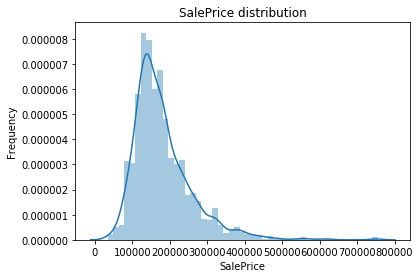

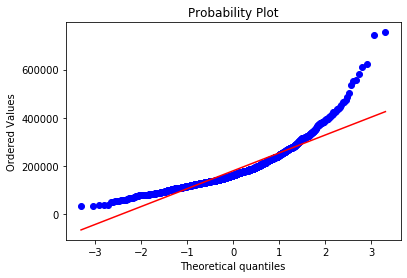

In [7]:
# dist Plot
sns.distplot(housing["SalePrice"])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


# prob plot 
#scipy.stats.probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)[source]
#Calculate quantiles for a probability plot, and optionally show the plot.
#Generates a probability plot of sample data against the quantiles of a specified theoretical distribution 
#(the normal distribution by default).probplot optionally calculates a best-fit line for the data and plots
#the results using Matplotlib or a given plot function.

# ref - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

fig = plt.figure()
stats.probplot(housing["SalePrice"], plot = plt)
plt.show()

- As we can see the Sale Price is not normally distributed and it's right skewed.

- We need to make the Sale Price normal distribution and that we will go later in sometime.

In [8]:
# lets check the null value 
round(100*(housing.isnull().sum()/housing.shape[0]),2)[round(100*(housing.isnull().sum()/housing.shape[0]),2).values>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

- We have list of where we have null value in data
- Lets store the Column name on the list which has null value

In [9]:
# store the Column name on the list which has null value
col_with_null = [col for col in housing.columns if housing[col].isna().sum()>=1]

In [10]:
# how many columns which having null value
print("{} columns where null value is present.".format(len(col_with_null)))

19 columns where null value is present.


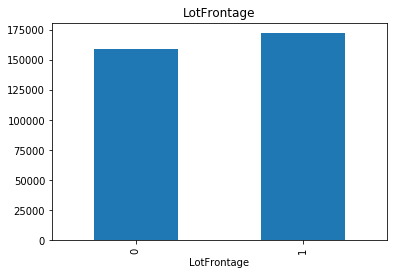

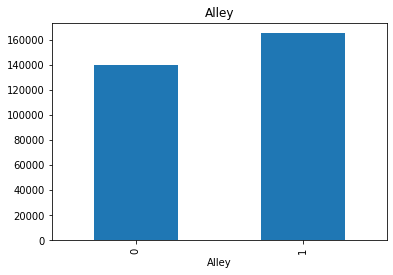

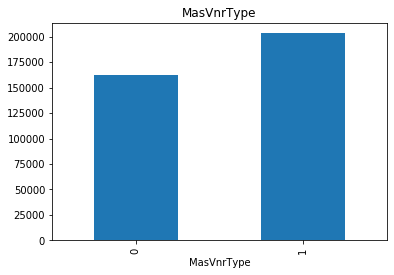

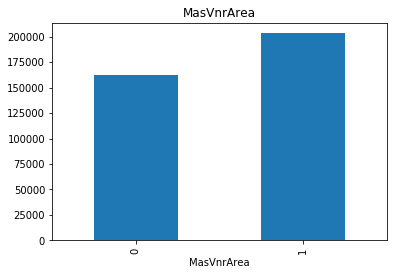

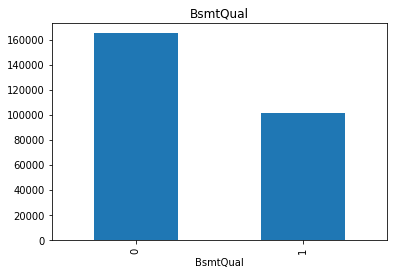

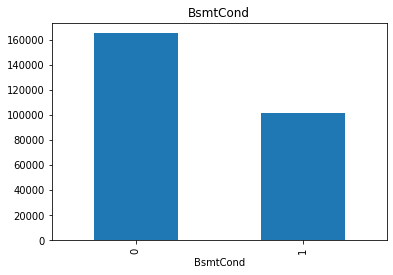

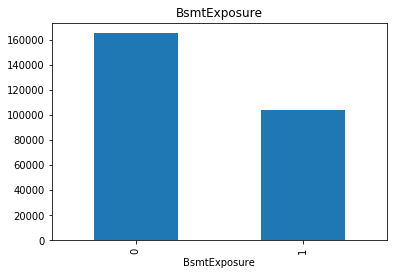

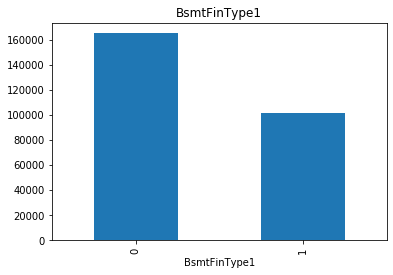

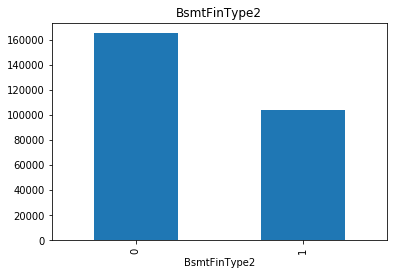

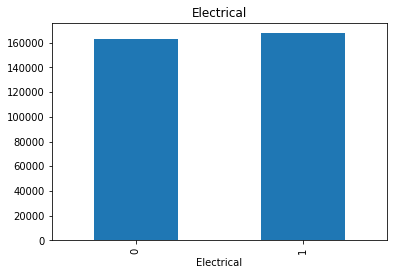

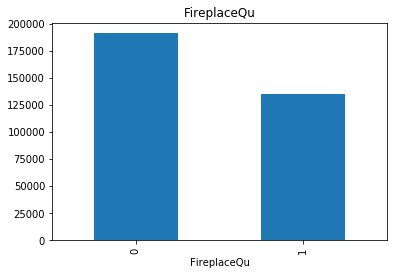

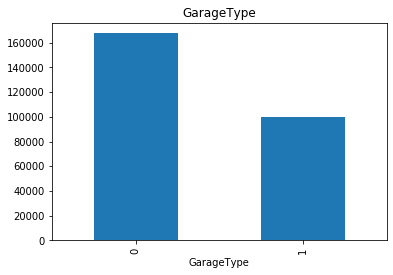

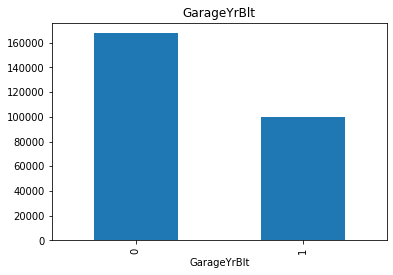

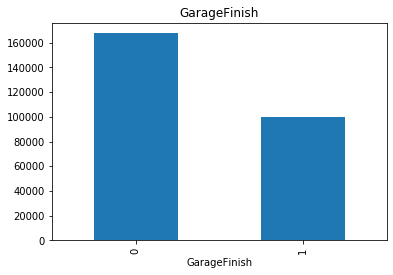

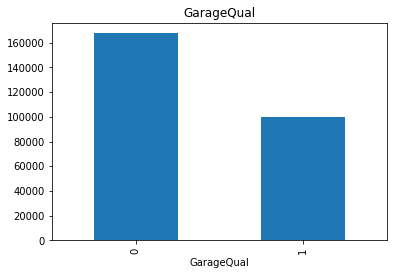

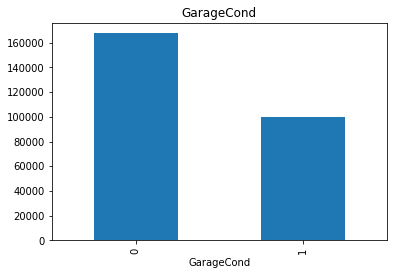

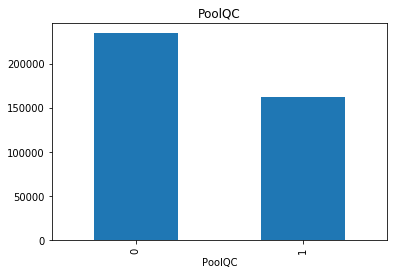

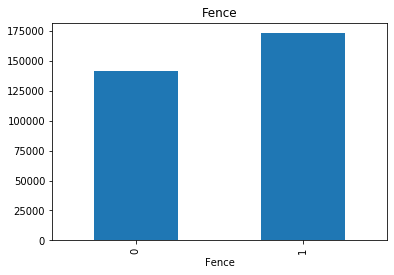

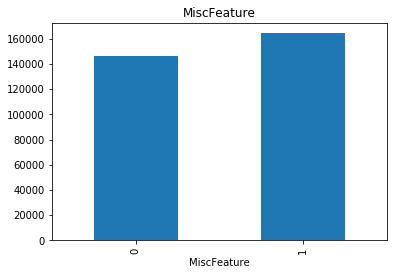

In [11]:
# lets check realtion ship the columns which have null value and Sale Price, so that we can check we have drop those columns or 
# fill with some value from data dict.

# Here I did where is null value, replace with 1 and for other 0 so that we can see the realtion clearly
for col in col_with_null:
    data = housing.copy()
    data[col]=np.where(data[col].isna(),1,0)
    
    data.groupby(col)["SalePrice"].median().plot.bar()
    plt.title(col)
    plt.show()

- Here relation between the missing values and the dependent variable is clearly visible.
- So we will immute the null value with value given in data dictionary 


# Numerical Variables

In [12]:
# Numerical coulumns
numerical_col = [col for col in housing.columns if housing[col].dtypes!="object"]

In [13]:
# Numerical coulumns head part
housing[numerical_col].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
# Numerical coulumns count
print("There is {} Numerical coulumns in this dataset." .format(len(numerical_col)))

There is 38 Numerical coulumns in this dataset.


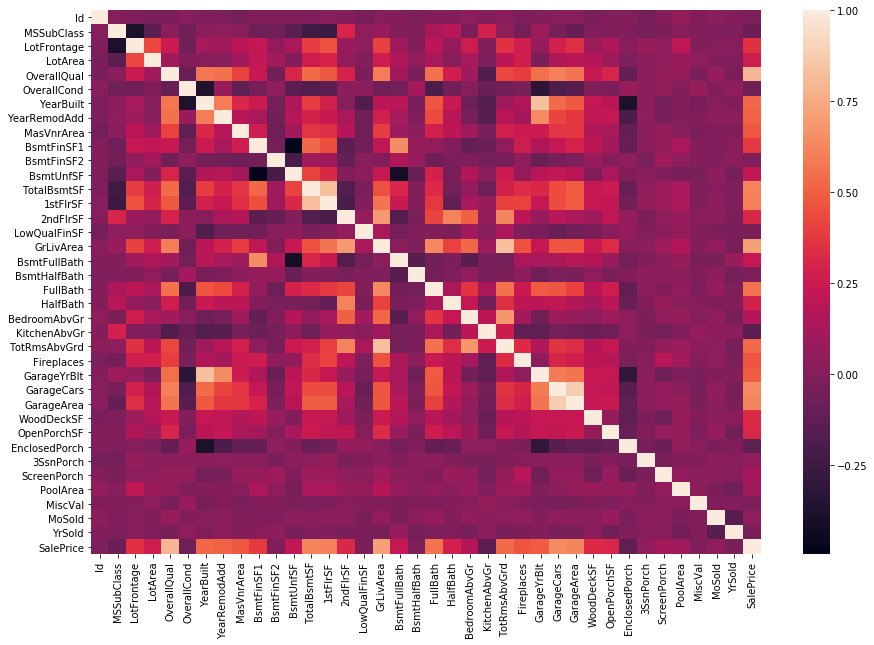

In [15]:
# correlation matrix heatmap - to see the corr of the variable each other and with Sale Price
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr())

- At bottom we can see the some are variable is high corr. with Sale Price and let take out the top 15 high corr. columns 

In [16]:
# map features to their absolute correlation values
corr = housing.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
print(corr_cols[corr_cols > 0.65])

GarageArea      0.882475
GarageCars      0.882475
YearBuilt       0.825667
GarageYrBlt     0.825667
GrLivArea       0.825489
TotRmsAbvGrd    0.825489
TotalBsmtSF     0.819530
1stFlrSF        0.819530
OverallQual     0.790982
SalePrice       0.790982
2ndFlrSF        0.687501
BedroomAbvGr    0.676620
dtype: float64


- Highly correlated features: 
        GarageArea      0.882475
        GarageCars      0.882475
        YearBuilt       0.825667
        GarageYrBlt     0.825667
        GrLivArea       0.825489
        TotRmsAbvGrd    0.825489
        TotalBsmtSF     0.819530
        1stFlrSF        0.819530
        OverallQual     0.790982

## Year column

In [17]:
# We can see some date time columns lets check these 4 columns
year_col = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]

# lets see the data in side yer column
for col in year_col:
    print(col, housing[col].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

- YrSold [2008 2007 2006 2009 2010]

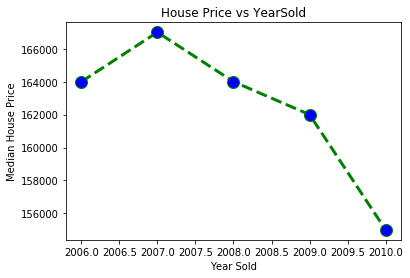

In [18]:
# lets these columns has any realtion with Sale Price
x =np.sort(housing["YrSold"].unique(), axis = -1)
y= housing.groupby('YrSold')['SalePrice'].median()
plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")
plt.show()


- Here, House Price is decreasing as year is increasing

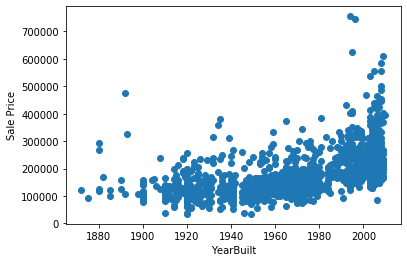

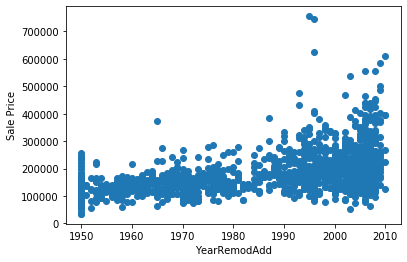

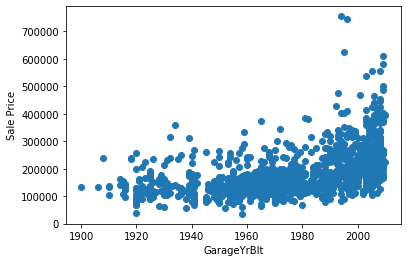

In [19]:
# here we will do the diff between all years feature with saleprice

for col in year_col:
    if col!='YrSold':
        dataset = housing.copy()
        dataset[col]=dataset['YrSold']-data[col]
        plt.scatter(data[col],data["SalePrice"])
        plt.xlabel(col)
        plt.ylabel("Sale Price")
        plt.show()


- Price is incearsing as time is increasing as this is saying that Year build is old date then price is low and vice versa.
- Same is happening from other two columns YearRemodAdd and GarageyrBlt

In [20]:
# In Numerical columns, we have to 2 variable called -Continious and Discrete Variable

discrete_col = [col for col in numerical_col if len(housing[col].unique()) < 35 and col not in year_col+['Id']]

In [21]:
print(" {} Discrete Variables columns available.".format(len(discrete_col)))

 17 Discrete Variables columns available.


In [22]:
# hed part of the data
housing[discrete_col].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


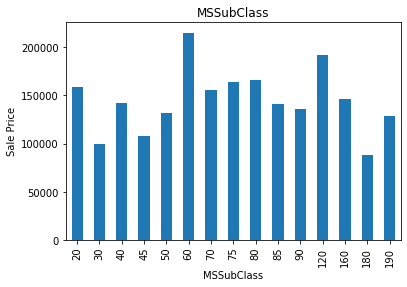

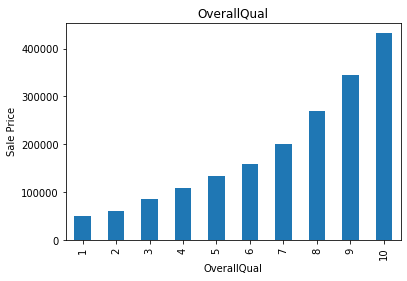

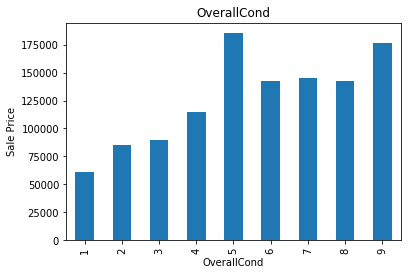

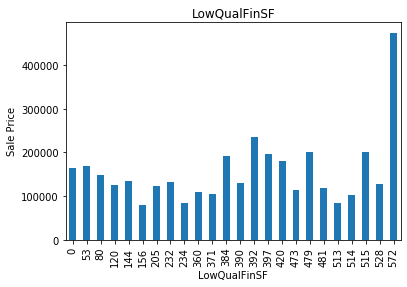

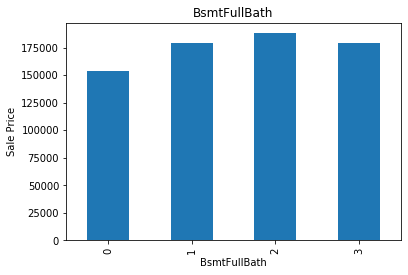

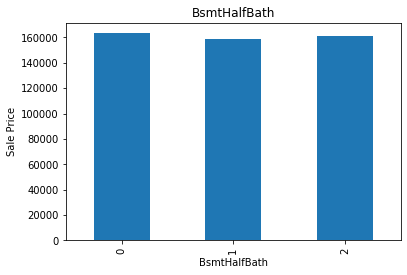

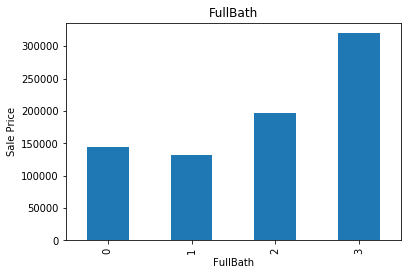

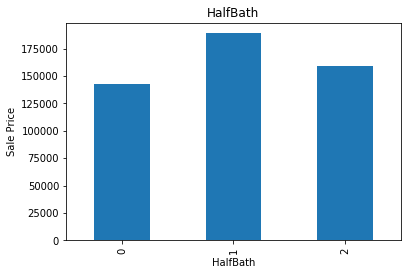

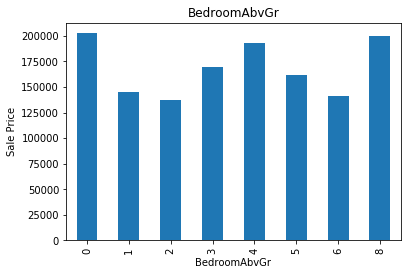

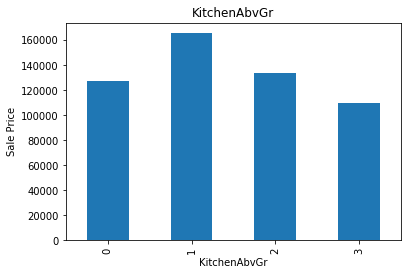

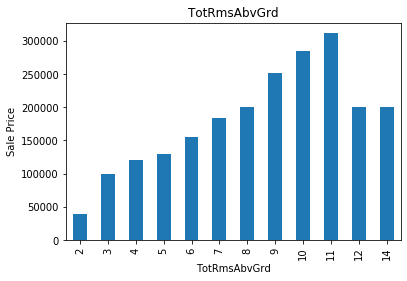

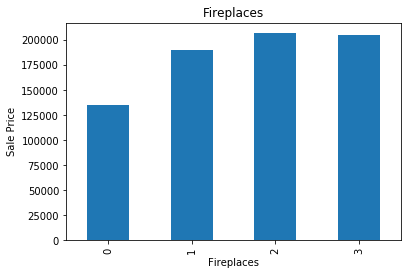

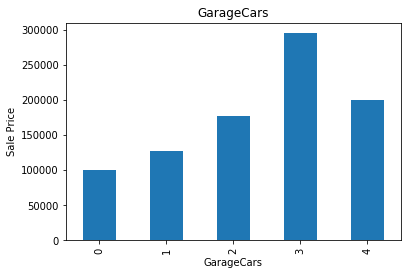

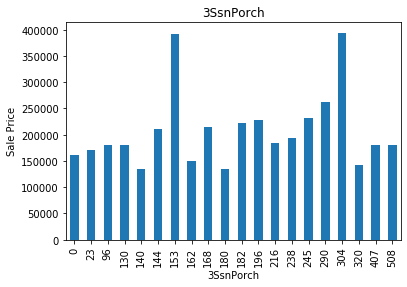

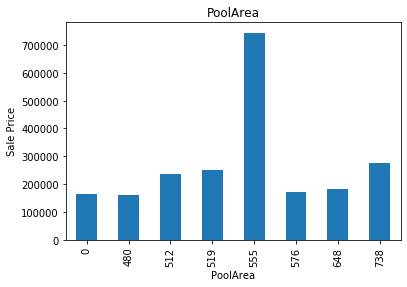

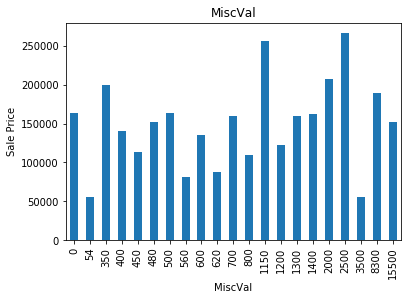

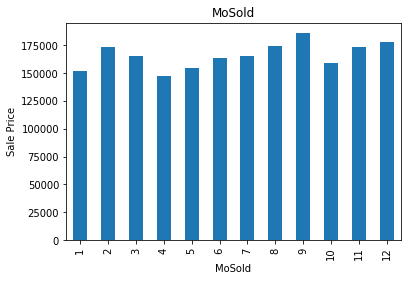

In [23]:
# Lets draw the graph to see the relationship between Discrete Variables and Sales Price
for col in discrete_col:
    dataset = housing.copy()
    dataset.groupby(col)["SalePrice"].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    plt.title(col)
    plt.show()


- We can see the OverallQual and TotRmsAbvGrd are incresing the price and also other columns giving decent realtion between Sale Price

# Continious Variable

In [24]:
# Continious Variable
continious_col = [col for col in numerical_col if col not in discrete_col+["Id"]+year_col]
print("{} Continious variables columns available.".format(len(continious_col)))

16 Continious variables columns available.


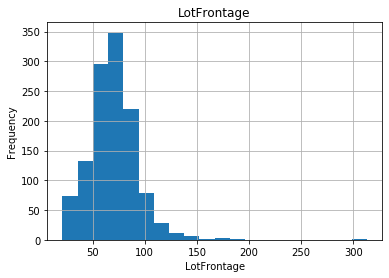

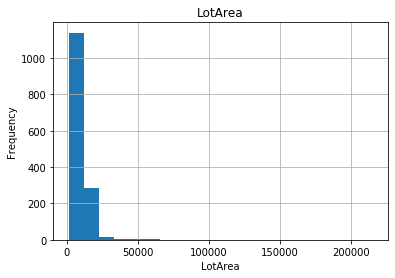

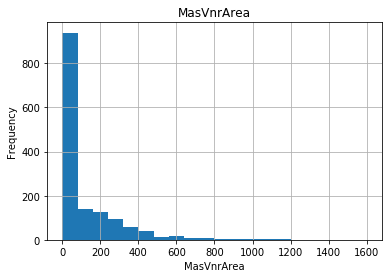

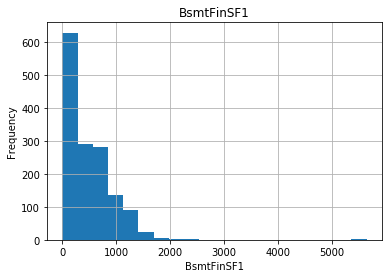

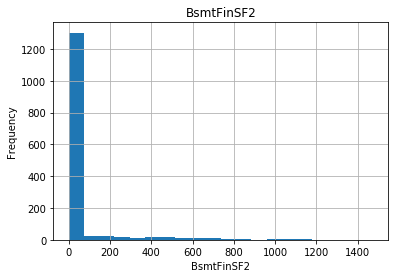

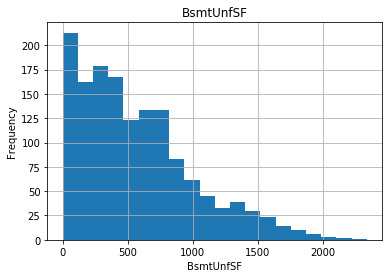

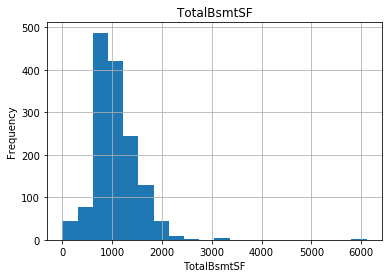

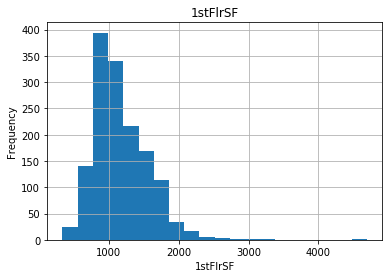

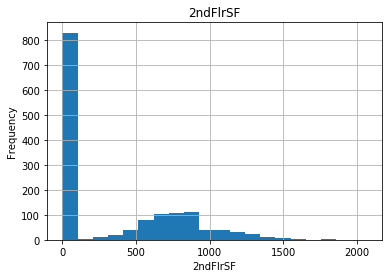

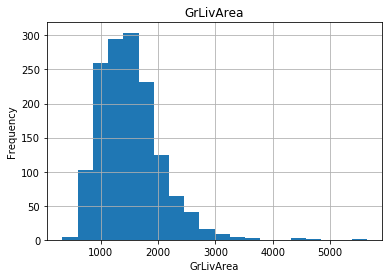

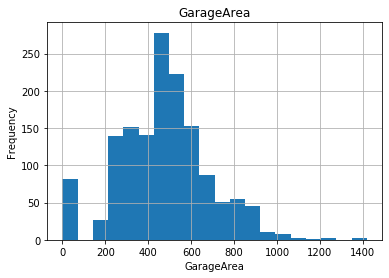

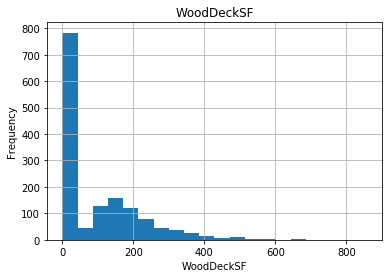

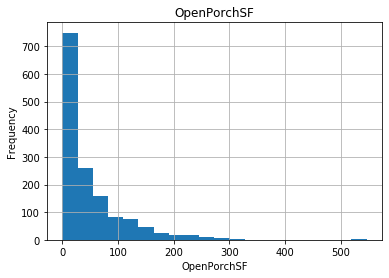

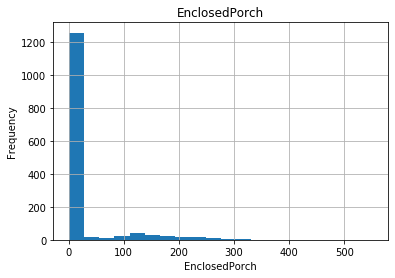

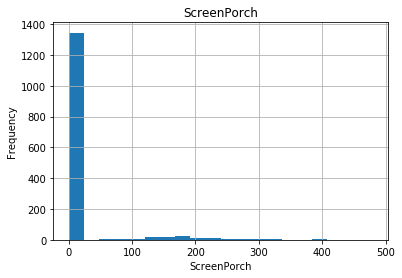

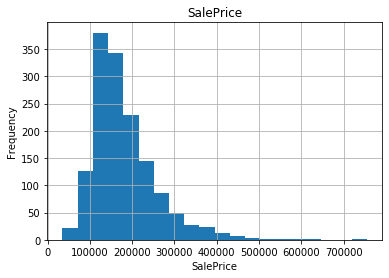

In [25]:
# now we will see the distribution of continious variable

for col in continious_col:
    dataset = housing.copy()
    dataset[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(col)
    plt.show()
    

- We can see the maximum Continious variable are right skewed including the Sale Price only few are normally distributed
- Here we are transforming the Sale Price value with help of log.

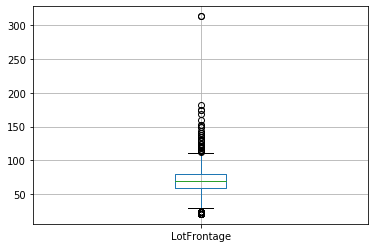

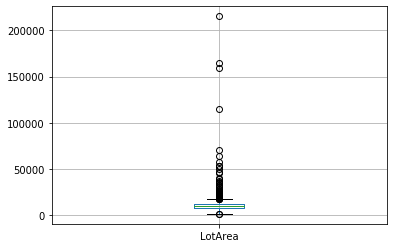

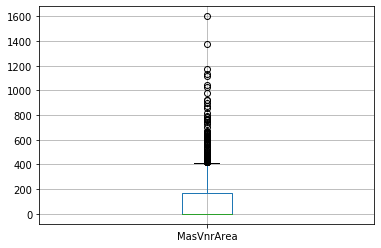

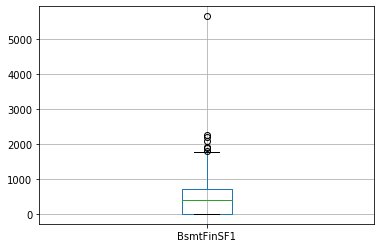

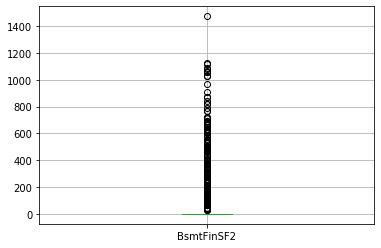

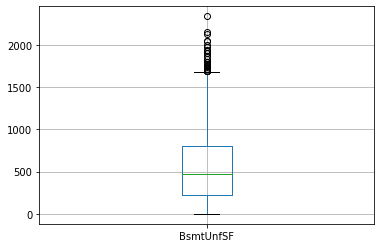

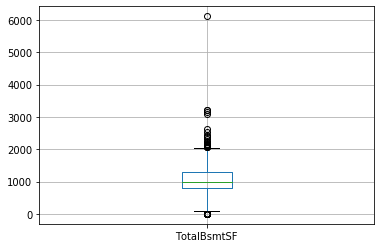

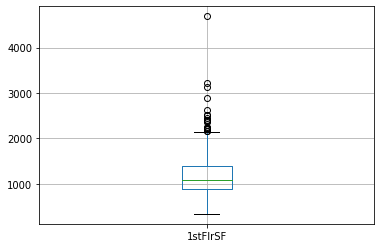

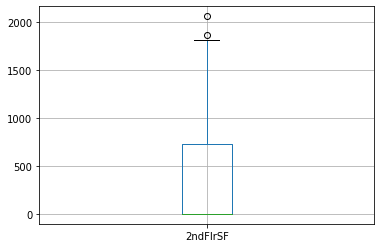

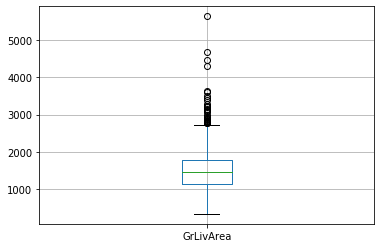

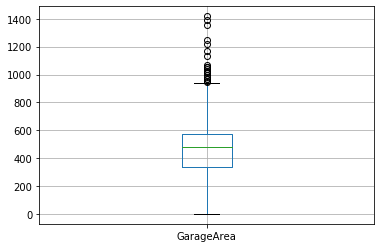

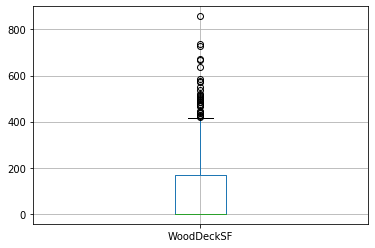

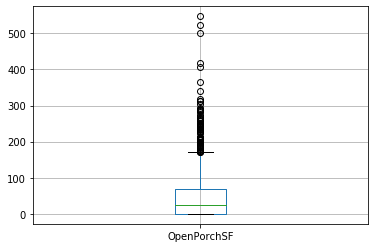

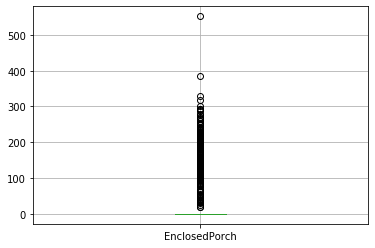

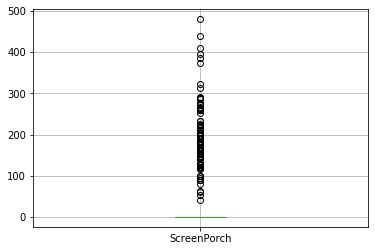

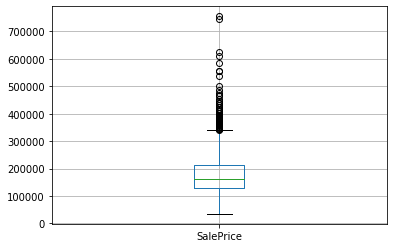

In [26]:
# Outliers cheking and inspection
dataset = housing.copy()
for col in continious_col:
        data.boxplot(col)
        plt.show()

- As can see the outliers present is mostly lets try to cap the value to 0.99 percentile

In [27]:
# continious_col with percentiles= [0.25,.50,.75,.90,.95,.99]

housing[continious_col].describe(percentiles= [0.01,0.25,.50,.75,.90,.95,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,21.954110,15.060959,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,61.119149,55.757415,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
1%,21.000000,1680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,692.180000,0.000000,0.000000,0.000000,0.000000,0.000000,61815.970000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
90%,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,278000.000000
95%,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,850.100000,335.000000,175.050000,180.150000,160.000000,326100.000000


In [28]:
# lets cap the outliers withing 0.01 and 0.99
for col in continious_col:
    if col !="SalePrice":
        percentiles = housing[col].quantile([0.01,0.99]).values
        housing[col][housing[col] <= percentiles[0]] = percentiles[0]
        housing[col][housing[col] >= percentiles[1]] = percentiles[1]

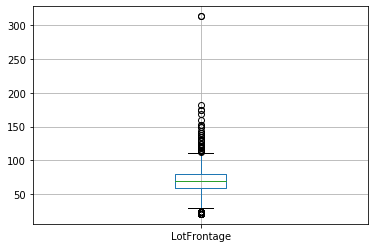

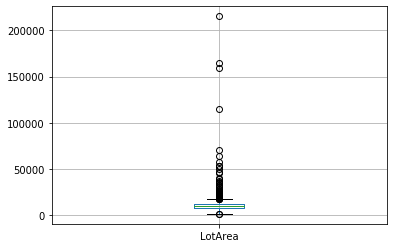

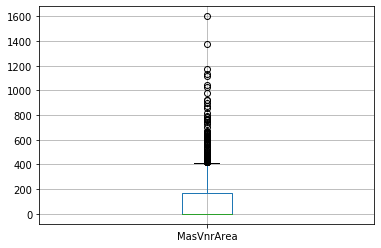

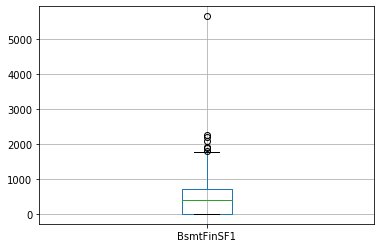

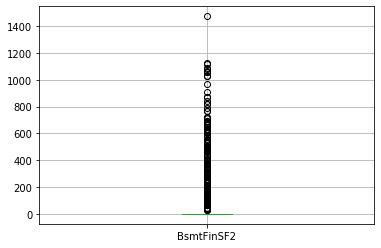

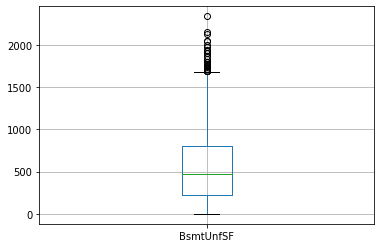

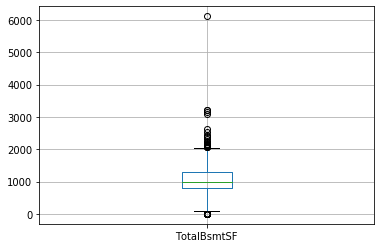

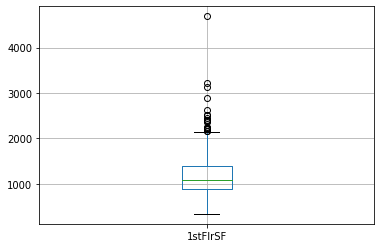

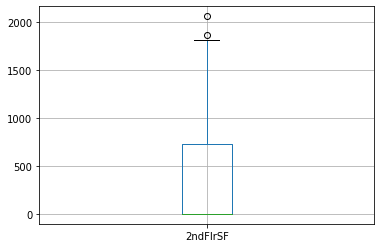

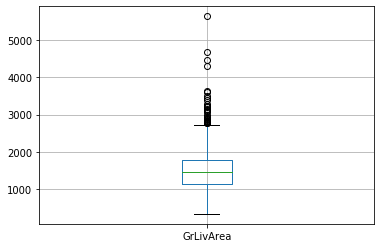

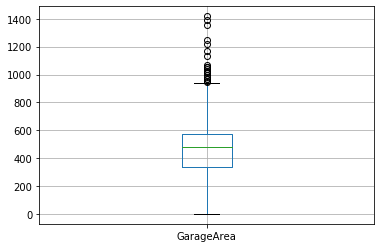

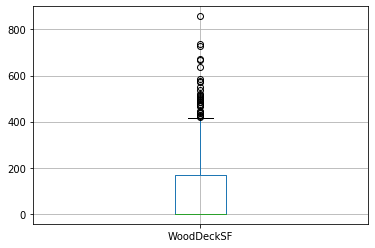

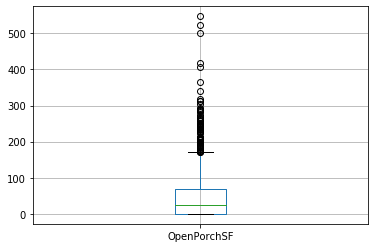

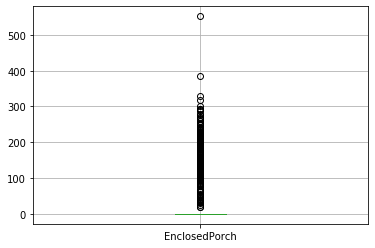

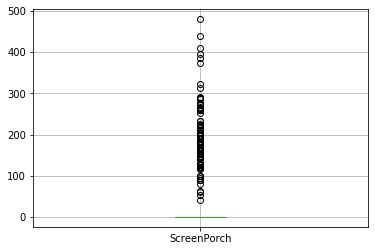

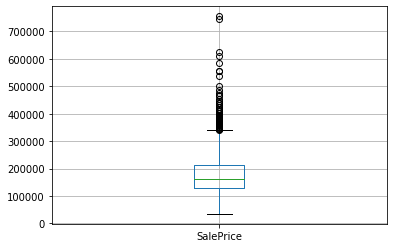

In [29]:
# Outliers Cheking and inspection after capping
dataset = housing.copy()
for col in continious_col:
        #dataset[col]=np.log(dataset[col])
        data.boxplot(col)
        plt.show()

In [30]:
# lets check the statistics with different percentiles value
housing[continious_col].describe(percentiles= [0.01,0.25,.50,.75,.90,.95,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.600333,10063.006575,101.174793,438.530240,44.404589,565.397089,1050.610788,1158.294452,345.021781,1510.289658,471.460856,93.155411,45.825548,21.434760,14.326541,180921.195890
std,21.723531,5062.299090,168.046772,429.049203,148.265347,436.085086,404.387881,363.802701,430.816964,495.148927,208.996193,120.812804,61.985174,58.382129,51.369279,79442.502883
min,21.000000,1680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,692.180000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
1%,21.000000,1680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,692.663800,0.000000,0.000000,0.000000,0.000000,0.000000,61815.970000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
90%,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,278000.000000
95%,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,850.100000,335.000000,175.050000,180.150000,160.000000,326100.000000


In [31]:
# Categorical columns - lets see the realation between Categorical columns and Sale Price

categorical_col = [col for col in housing.columns if housing[col].dtypes=='object']
print(categorical_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [32]:
# head data 
housing[categorical_col].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


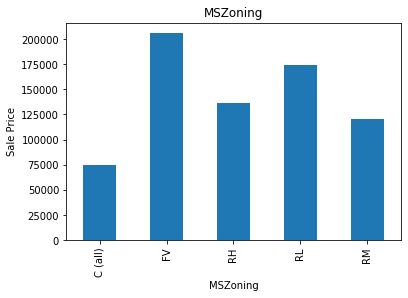

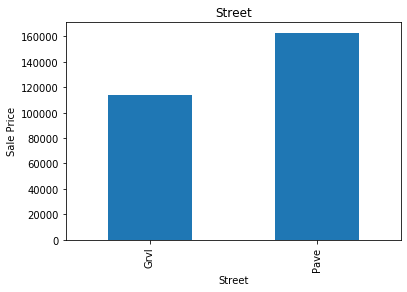

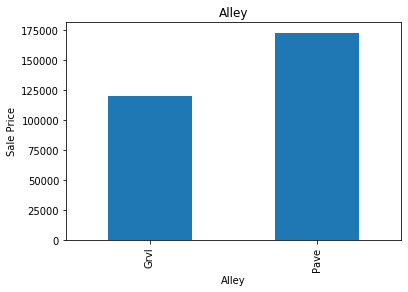

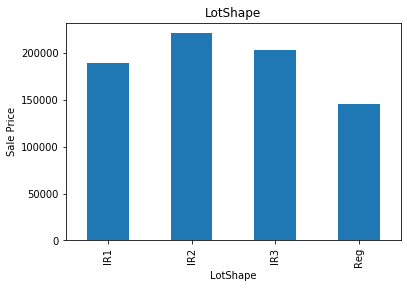

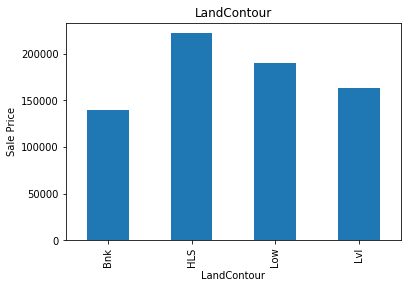

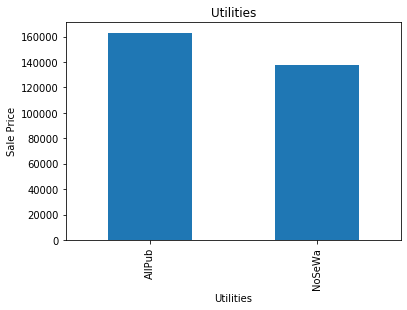

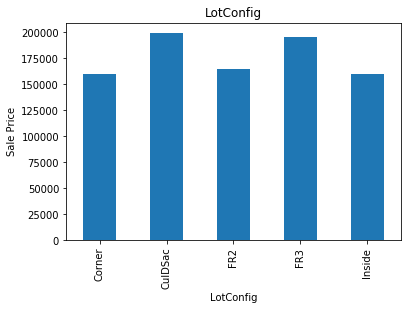

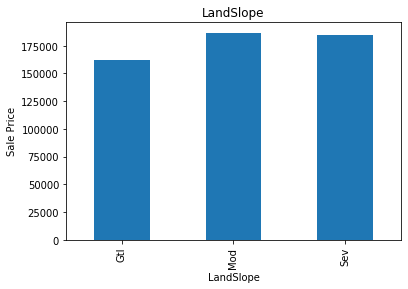

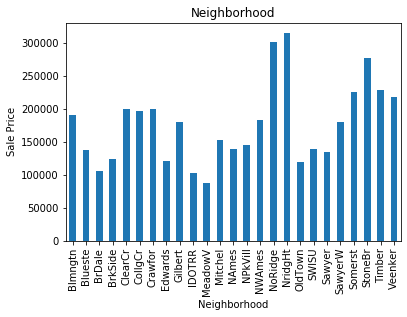

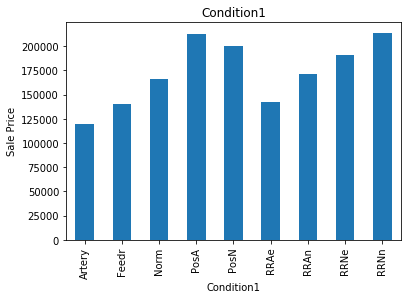

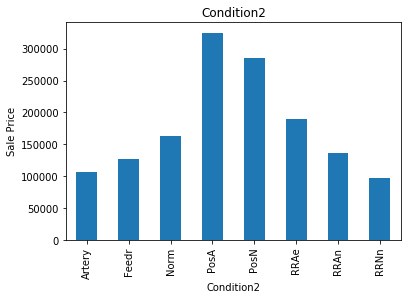

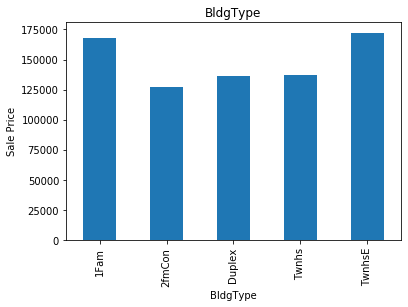

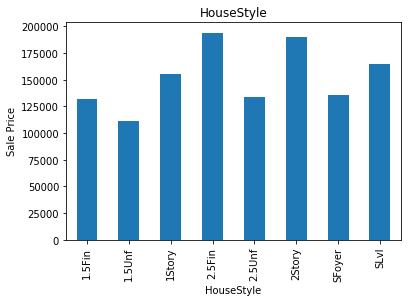

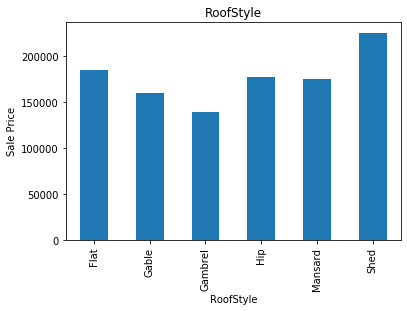

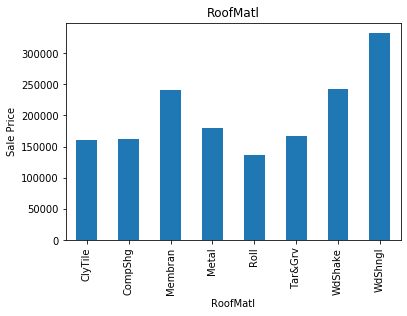

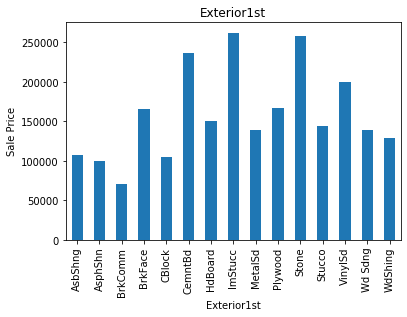

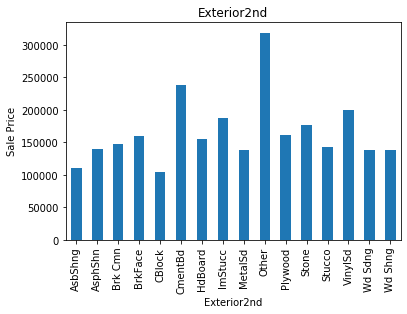

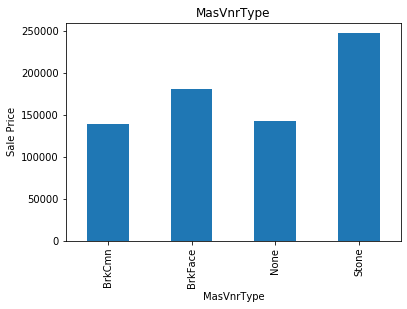

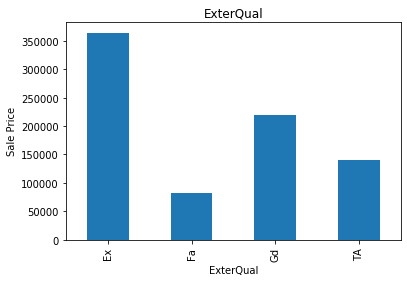

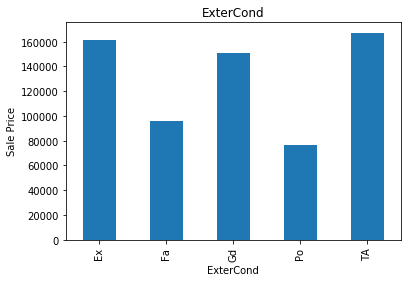

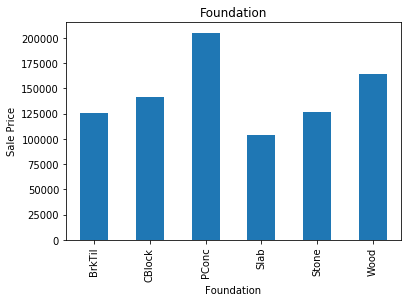

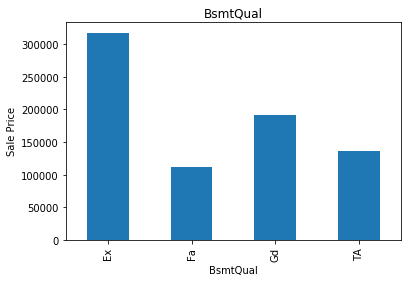

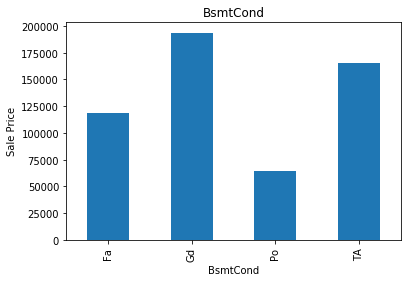

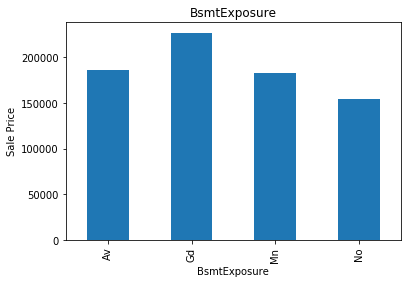

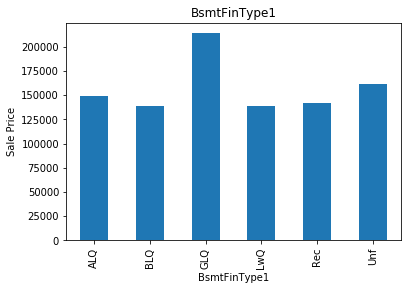

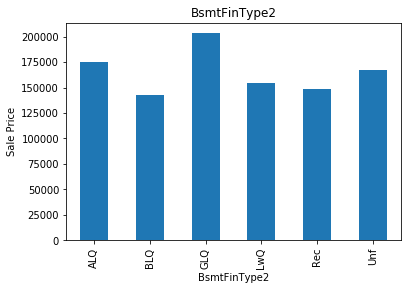

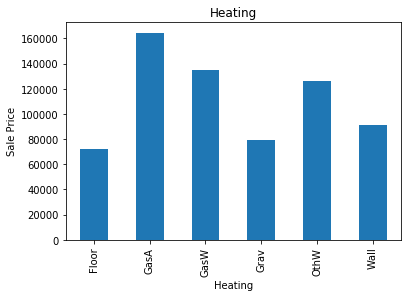

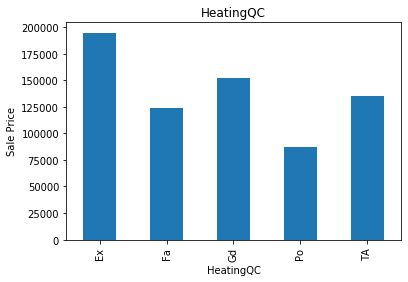

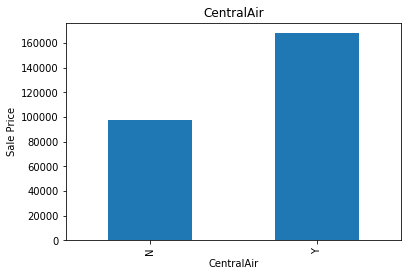

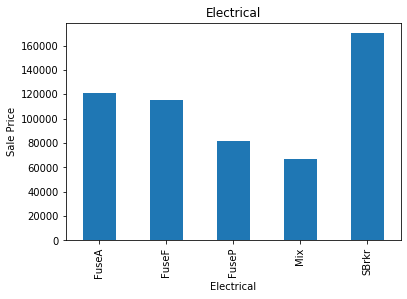

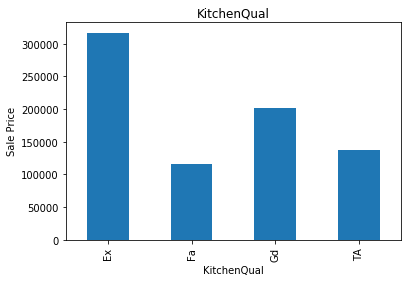

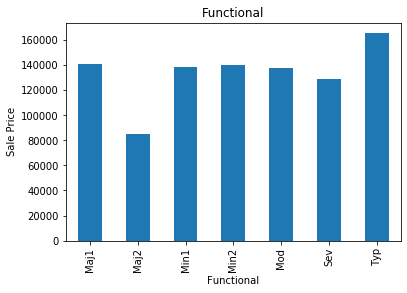

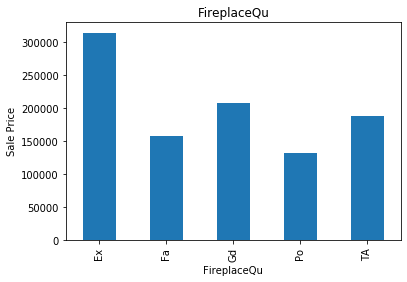

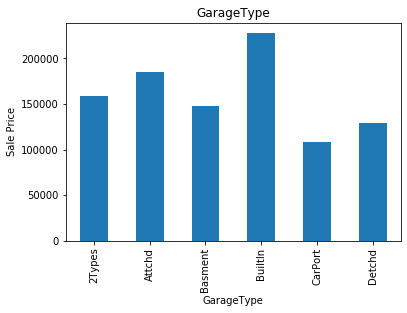

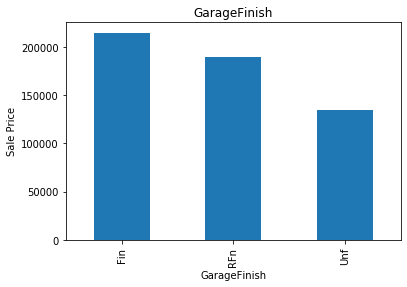

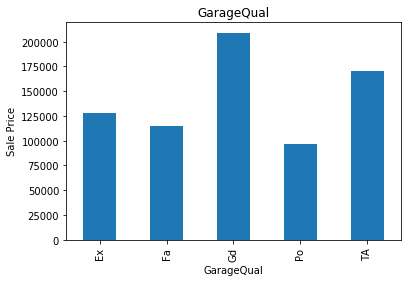

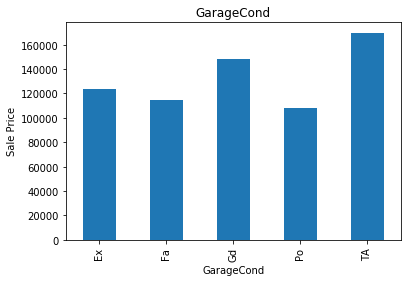

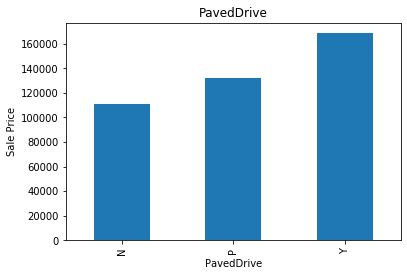

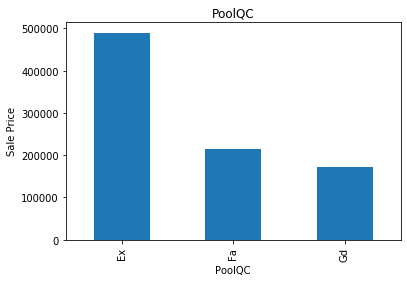

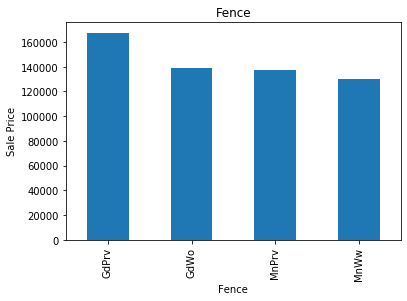

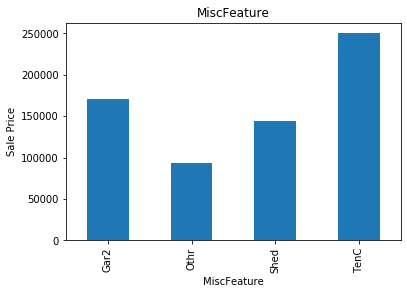

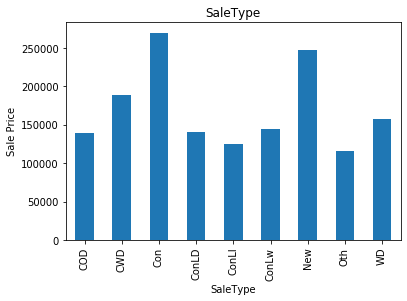

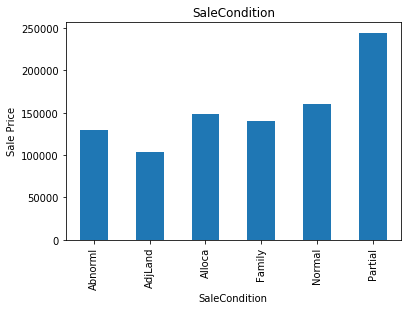

In [33]:
# lets plot the bar graph and see the result
for col in categorical_col:
    dataset=housing.copy()
    dataset.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.title(col)
    plt.show()

- Here, we can see the each categorical columns giving Sale Price and I visualize that as per data dict. price is validating like : MS Zoning with FV (Floating Village Residential) has maximum Sale Price in this.

# Feature Engineering

- We will be performing all the below steps in Feature Engineering

    - Missing values treatment 
    - Date/time variables treatment
    - Sale Price Transformation

#### Missing values treatment 

In [34]:
# lets see the columns whuch has missing value 
round(100*(housing.isnull().sum()/housing.shape[0]),2)[round(100*(housing.isnull().sum()/housing.shape[0]),2).values>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [35]:
# categorical_nan_col
categorical_nan_col = [col for col in housing.columns if housing[col].isna().sum()>0 and housing[col].dtypes=='object']

In [36]:
# categorical_nan_col
categorical_nan_col

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [37]:
# lets treat the null vale one by one for each categorical columns with the help of data dict.
housing["Alley"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["MasVnrType"].replace(to_replace = np.nan, value="None", inplace = True)
housing["BsmtQual"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["BsmtCond"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["BsmtExposure"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["BsmtFinType1"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["BsmtFinType2"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["Electrical"].replace(to_replace = np.nan, value="Mixed", inplace = True)
housing["FireplaceQu"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["GarageType"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["GarageFinish"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["GarageQual"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["GarageCond"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["PoolQC"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["Fence"].replace(to_replace = np.nan, value="NA", inplace = True)
housing["MiscFeature"].replace(to_replace = np.nan, value="NA", inplace = True)


In [38]:
# categorical_nan_col_after_treatment
categorical_nan_col_after_treatment = [col for col in housing.columns if housing[col].isna().sum()>0 and housing[col].dtypes=='object']

print("After Null value treatment this is list: \n {}".format(categorical_nan_col_after_treatment))

print("After Null value treatment, {} columns has Null value now.".format(len(categorical_nan_col_after_treatment)))

After Null value treatment this is list: 
 []
After Null value treatment, 0 columns has Null value now.


In [39]:
# numrical_nan_col
numrical_nan_col = [col for col in housing.columns if housing[col].isna().sum()>0 and housing[col].dtypes!='object']

In [40]:
# numrical_nan_col
numrical_nan_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [41]:
# let fill the null value with mean
housing["LotFrontage"].replace(to_replace = np.nan, value=housing["LotFrontage"].mean(), inplace = True)
housing["MasVnrArea"].replace(to_replace = np.nan, value=housing["MasVnrArea"].mean(), inplace = True)
housing["GarageYrBlt"].replace(to_replace = np.nan, value=housing["GarageYrBlt"].mean(), inplace = True)

In [42]:
# numrical_nan_col_after_treatment
numrical_nan_col_after_treatment = [col for col in housing.columns if housing[col].isna().sum()>0 and housing[col].dtypes!='object']

print("After Null value treatment this is list: \n {}".format(numrical_nan_col_after_treatment))

print("After Null value treatment, {} columns has Null value now.".format(len(numrical_nan_col_after_treatment)))

After Null value treatment this is list: 
 []
After Null value treatment, 0 columns has Null value now.


#### Date/time variables treatment

In [43]:
# Date Time Variables in data set the new value
print(year_col)
for col in year_col:
    if col!='YrSold':
        housing[col]=housing['YrSold']-housing[col]


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [44]:
# lets check the data after value changed
housing[year_col].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [45]:
# lets check the null vale count 
round(100*(housing.isnull().sum()/housing.shape[0]),2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

- Successfully we able to handle the misssing values..

### Sale Price Transformation

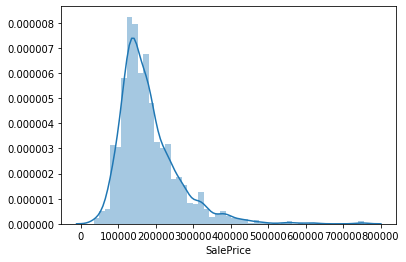

In [46]:
# lets plot the distplot before transformation
sns.distplot(housing["SalePrice"])

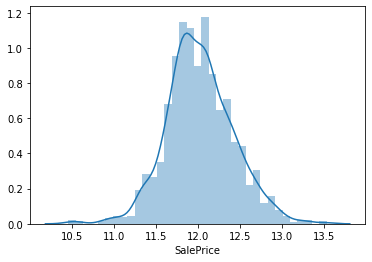

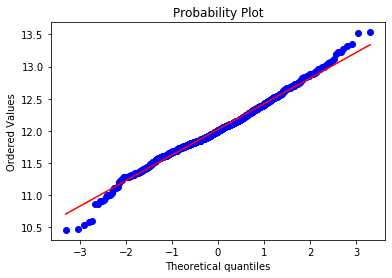

In [47]:
# we have transform the Sale Price 
housing["SalePrice"] = np.log(housing["SalePrice"])

# plot the distplot
sns.distplot(housing["SalePrice"])

# plotthe probplot 
fig = plt.figure()
stats.probplot(housing["SalePrice"], plot = plt)
plt.show()

# Data Preparation

In [48]:
# Lets store the independent and dependent variable to X and y
X = housing[map(lambda col :col not in ["Id","SalePrice"], list(housing.columns))]
y = housing["SalePrice"]

In [49]:
# independent data head part
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,Inside,...,0.0,0,NA,NA,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,FR2,...,0.0,0,NA,NA,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,Inside,...,0.0,0,NA,NA,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,Corner,...,0.0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,FR2,...,0.0,0,NA,NA,NA,0,12,2008,WD,Normal


In [50]:
# dependent data head part
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [51]:
# categorical coumns
print(categorical_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Dummy variable creation 

In [52]:
# Dummy varuiable creation 
housing_dummy = pd.get_dummies(housing[categorical_col], drop_first=False)
housing_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [53]:
# Shape of X

X.shape

(1460, 79)

In [54]:
# lets drop the original Categorical columns
X = X.drop(categorical_col, axis = 1)

In [55]:
# after removal of original Categorical columns
X.shape

(1460, 36)

In [56]:
# Lets concat the data now
X = pd.concat([X,housing_dummy],axis=1)

In [57]:
# head part of X
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,5,5,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600.0,6,8,31,31,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250.0,7,5,7,6,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550.0,7,5,91,36,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260.0,8,5,8,8,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [58]:
# shape of X after adding dummy variables
X.shape

(1460, 303)

## Train and test Split

In [59]:
# Train and test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3,random_state = 100)

In [60]:
# lets check the length of train and test
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1021
438
1021
438


In [61]:
# X_train head data
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,30,67.0,5604.0,5,6,83,58,0.0,468.0,0.0,...,0,0,0,1,0,0,0,0,1,0
318,60,90.0,9900.0,7,5,16,16,256.0,987.0,0.0,...,0,0,0,1,0,0,0,0,1,0
239,50,52.0,8741.0,6,4,65,60,0.0,94.0,0.0,...,0,0,0,1,0,0,0,0,1,0
986,50,59.0,5310.0,6,8,96,3,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1416,190,60.0,11340.0,4,6,125,60,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## Feature Scaling

In [62]:
# Feature Scaling

scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.88808645, -0.46331176, -0.20170935, ..., -0.11790963,
         0.45951132, -0.29157493],
       [ 0.03597599,  0.98158225,  0.32823751, ..., -0.11790963,
         0.45951132, -0.29157493],
       [-0.88808645, -0.31383996, -0.42711207, ..., -0.11790963,
         0.45951132, -0.29157493],
       ...,
       [ 0.03597599, -0.2141921 , -0.37702258, ..., -0.11790963,
         0.45951132, -0.29157493],
       [-0.19503962,  0.01501458,  0.7674222 , ..., -0.11790963,
         0.45951132, -0.29157493],
       [ 0.03597599,  0.03492755,  0.24048071, ..., -0.11790963,
         0.45951132, -0.29157493]])

# Model Building and Evaluation

## Ridge Regression

In [63]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# defne the instance for ridge
ridge = Ridge()

# cross validation with folds 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
# lets check best parameter and Score (neg_mean_absolute_error)

print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 20}
-0.08331033276115005


In [65]:
# lets now create the CV results and check
cv_result = pd.DataFrame(ridge_model_cv.cv_results_)
cv_result = cv_result[cv_result['param_alpha']<=1000]
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058388,0.008236,0.007995,0.002531,0.0001,{'alpha': 0.0001},-0.106287,-0.094656,-0.093823,-0.085008,...,-0.092450,0.008427,27,-0.054376,-0.054998,-0.055102,-0.056659,-0.056409,-0.055509,0.000877
1,0.048777,0.007631,0.007998,0.000005,0.001,{'alpha': 0.001},-0.102135,-0.094594,-0.093978,-0.084639,...,-0.091531,0.007233,26,-0.054473,-0.054996,-0.055177,-0.056819,-0.056497,-0.055593,0.000906
2,0.030842,0.005850,0.005523,0.005857,0.01,{'alpha': 0.01},-0.092784,-0.094087,-0.094179,-0.083805,...,-0.089370,0.005340,24,-0.054790,-0.054999,-0.055367,-0.057181,-0.056759,-0.055819,0.000967
3,0.041852,0.010729,0.008650,0.006233,0.05,{'alpha': 0.05},-0.092560,-0.092777,-0.093744,-0.082729,...,-0.088639,0.005409,23,-0.055140,-0.055156,-0.055525,-0.057449,-0.057040,-0.056062,0.000984
4,0.034671,0.006890,0.004571,0.005771,0.1,{'alpha': 0.1},-0.092482,-0.091824,-0.093338,-0.081777,...,-0.088130,0.005439,22,-0.055496,-0.055411,-0.055699,-0.057701,-0.057364,-0.056334,0.000989


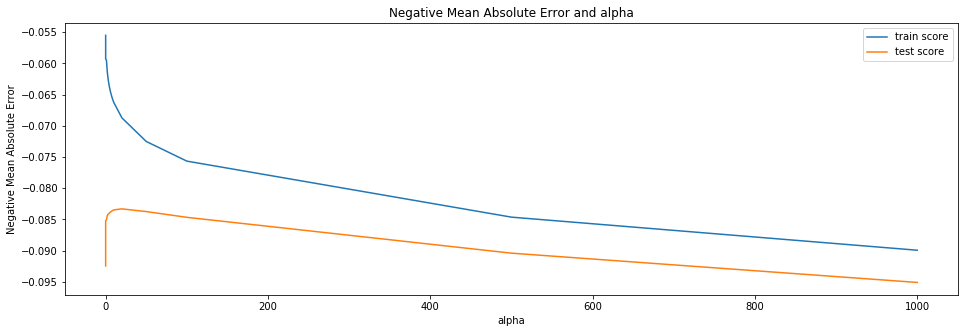

In [66]:
# plotting mean test and train scoes with alpha 
cv_result['param_alpha'] = cv_result['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

- From the above graph and the bestparam score we got optimum lambda to be 20

In [67]:
# best parameter for model ridge
ridge_model_cv.best_params_

{'alpha': 20}

In [68]:
# lets now go with alpha 20 and run the ridge model
alpha = 20

ridge = Ridge(alpha=alpha)

# fit the Train data
ridge.fit(X_train, y_train)


Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [69]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.933400528176322


In [70]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8923298823231627


In [71]:
from sklearn.metrics import mean_squared_error
print ('RMSE is:', mean_squared_error(y_test, y_test_pred))

RMSE is: 0.017716053709131378


## Lasso 

In [72]:
lasso = Lasso()

# cross validation with folds 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

# lets fit the model and see the results
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   21.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [73]:
# lets store the result in CV_result to proceed further
cv_result = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.526092,0.185988,0.001599,0.001958,0.0001,{'alpha': 0.0001},-0.083985,-0.086782,-0.087766,-0.076289,...,-0.081850,0.005475,2,-0.057885,-0.057389,-0.058071,-0.059419,-0.059595,-0.058472,0.000876
1,0.281181,0.022765,0.004723,0.005730,0.001,{'alpha': 0.001},-0.080703,-0.086278,-0.087398,-0.072087,...,-0.081366,0.005439,1,-0.072773,-0.068674,-0.068631,-0.073569,-0.073337,-0.071397,0.002256
2,0.376562,0.194848,0.002822,0.001599,0.01,{'alpha': 0.01},-0.088922,-0.096454,-0.101890,-0.084202,...,-0.092900,0.006080,3,-0.091762,-0.086605,-0.085994,-0.092043,-0.089136,-0.089108,0.002515
3,0.540193,0.158949,0.010052,0.003997,0.05,{'alpha': 0.05},-0.096627,-0.110980,-0.114634,-0.101446,...,-0.105639,0.006475,4,-0.104464,-0.099194,-0.099613,-0.103810,-0.102631,-0.101943,0.002159
4,0.274804,0.104313,0.008463,0.001889,0.1,{'alpha': 0.1},-0.101461,-0.117323,-0.118437,-0.106694,...,-0.110718,0.006424,6,-0.110503,-0.104317,-0.104079,-0.108775,-0.108045,-0.107144,0.002536


In [74]:
#lets find out the R-squared value of the lasso model
lasso_model_cv_r2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
lasso_model_cv_r2.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   18.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [75]:
# cv results
cv_result_r2 = pd.DataFrame(lasso_model_cv_r2.cv_results_)
cv_result_r2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.461546,0.052334,0.003199,0.001599,0.0001,{'alpha': 0.0001},0.901041,0.842545,0.851140,0.923765,...,0.892311,0.039500,2,0.962542,0.961482,0.960511,0.958705,0.956349,0.959918,0.002186
1,0.395877,0.146335,0.002963,0.002629,0.001,{'alpha': 0.001},0.907116,0.856186,0.850803,0.930731,...,0.893814,0.033830,1,0.930150,0.938711,0.937944,0.927484,0.923197,0.931497,0.006007
2,0.273642,0.030887,0.003198,0.001599,0.01,{'alpha': 0.01},0.888538,0.834318,0.813857,0.903855,...,0.868136,0.036860,3,0.884784,0.896475,0.898476,0.881982,0.881462,0.888636,0.007333
3,0.150472,0.076718,0.004724,0.005736,0.05,{'alpha': 0.05},0.866919,0.808434,0.776045,0.857087,...,0.835838,0.037274,4,0.850886,0.861328,0.866820,0.851508,0.846113,0.855331,0.007580
4,0.099822,0.037308,0.003923,0.006052,0.1,{'alpha': 0.1},0.855837,0.796098,0.765538,0.842911,...,0.823703,0.036660,6,0.835368,0.848444,0.856428,0.839120,0.832182,0.842309,0.008920


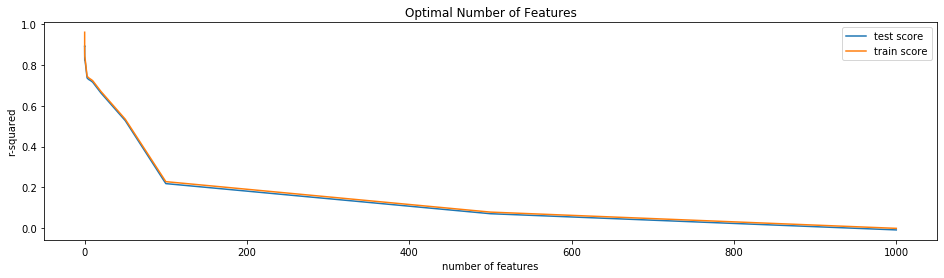

In [76]:
# plotting cv results for r-squared
plt.figure(figsize=(16,4))

plt.plot(cv_result_r2["param_alpha"], cv_result_r2["mean_test_score"])
plt.plot(cv_result_r2["param_alpha"], cv_result_r2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [77]:
#checking the value of optimum number of parameters
print(lasso_model_cv_r2.best_params_)
print(lasso_model_cv_r2.best_score_)

{'alpha': 0.001}
0.8938140397898073


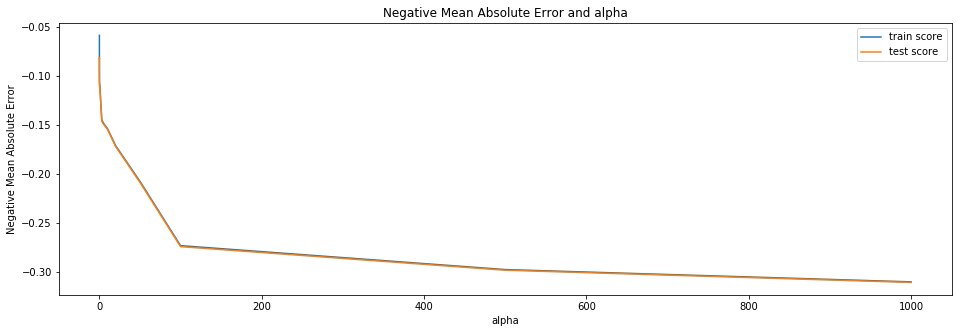

In [78]:
# plotting for Negative Mean Absolute Error
plt.figure(figsize=(16,5))
plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

- from the above graph and the bestparam score we got optimum lambda to be 0.001

In [79]:
#checking the value of optimum number of parameters
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.0813664089649294


In [80]:
# lets go ahead with alpha value and run the Lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)

# lets filt the model
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9244515508990169


In [82]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8941243154385654


In [83]:
from sklearn.metrics import mean_squared_error
print ('RMSE is:', mean_squared_error(y_test, y_test_pred))

RMSE is: 0.017420797475221295


## SelectFromModel

- first, I specify the Regression model, and I select a suitable alpha (equivalent of penalty). The bigger the alpha the less features that will be selected. Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero
- ref - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

### Ridge

In [84]:
# Ridge
feature_sel_model = SelectFromModel(Ridge(alpha=20, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Ridge(alpha=20, copy_X=True, fit_intercept=True,
                                max_iter=None, normalize=False, random_state=0,
                                solver='auto', tol=0.001),
                max_features=None, norm_order=1, prefit=False, threshold=None)

- get_support(self, indices=False)[source]¶

- An index that selects the retained features from a feature vector. If indices is False, this is a boolean array of shape [# input features], in which an element is True iff its corresponding feature is selected for retention. If indices is True, this is an integer array of shape [# output features] whose values are indices into the input feature vector.


In [85]:
# read above for this - get_support ()
feature_sel_model.get_support()

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [86]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('Total features: {}'.format((X_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients truned to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

Total features: 303
Selected features: 107
Features with coefficients truned to zero: 5


In [87]:
# list of seleted feature
selected_feat

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath',
       'KitchenAbvGr', 'GarageCars', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL',
       ...
       'PavedDrive_P', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'Fence_GdWo',
       'SaleType_COD', 'SaleType_ConLD', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_Normal'],
      dtype='object', length=107)

In [88]:
# lets check the head part
X_train[selected_feat].head()

,OverallQual,OverallCond,BsmtFullBath,FullBath,KitchenAbvGr,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,PavedDrive_P,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,SaleType_COD,SaleType_ConLD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
210,5,6,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
318,7,5,1,2,1,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
239,6,4,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
986,6,8,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1416,4,6,0,2,2,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Lasso

In [89]:
# Lasso
feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [90]:
# read above for this - get_support ()
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [91]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('Total features: {}'.format((X_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients truned to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

Total features: 303
Selected features: 80
Features with coefficients truned to zero: 220


In [92]:
# list of seleted feature
selected_feat

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'YrSold', 'MSZoning_C (all)', 'MSZoning_RM', 'LandContour_Bnk',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Condition1_Norm', 'BldgType_Twnhs',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'Exterior1st_BrkFace',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd',

In [93]:
# lets check the head part
X_train[selected_feat].head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,FireplaceQu_Gd,FireplaceQu_NA,GarageType_Attchd,GarageFinish_Fin,GarageFinish_Unf,GarageQual_Fa,Fence_GdWo,SaleType_COD,SaleType_WD,SaleCondition_Abnorml
210,30,67.0,5,6,83,58,0.0,468.0,0.0,396.0,...,0,1,0,0,0,0,0,0,1,0
318,60,90.0,7,5,16,16,256.0,987.0,0.0,360.0,...,0,0,1,0,0,0,0,0,1,0
239,50,52.0,6,4,65,60,0.0,94.0,0.0,641.0,...,1,0,0,0,1,0,0,0,1,0
986,50,59.0,6,8,96,3,0.0,0.0,0.0,485.0,...,0,1,1,0,1,1,0,0,1,0
1416,190,60.0,4,6,125,60,0.0,0.0,0.0,777.0,...,0,1,0,0,1,0,0,0,1,0


Neighborhood_Crawfor    0.071583
OverallQual             0.049871
Neighborhood_Somerst    0.047577
Condition1_Norm         0.047398
Functional_Typ          0.046499
OverallCond             0.042337
Neighborhood_NridgHt    0.039974
Exterior1st_BrkFace     0.039290
MSZoning_FV             0.032901
MSZoning_RL             0.031833
dtype: float64


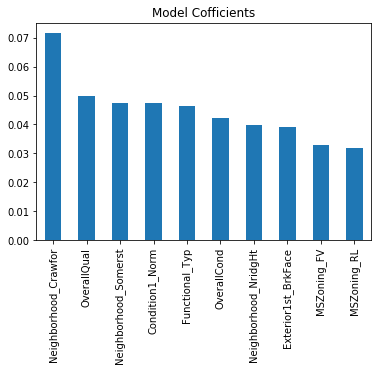

In [94]:
# lets see the top model parameter which is playing important role for predicting the price
pred = X.columns

coef_ridge = pd.Series(ridge.coef_,pred).sort_values(ascending=False)

print(coef_ridge.head(10))
coef_ridge.head(10).plot(kind = 'bar', title = "Model Cofficients")

Neighborhood_Crawfor    0.091763
Neighborhood_Somerst    0.060844
Condition1_Norm         0.058974
Exterior1st_BrkFace     0.054673
OverallQual             0.052834
Functional_Typ          0.047344
OverallCond             0.043685
Neighborhood_NridgHt    0.041537
BsmtQual_Ex             0.036229
GarageCars              0.028877
dtype: float64


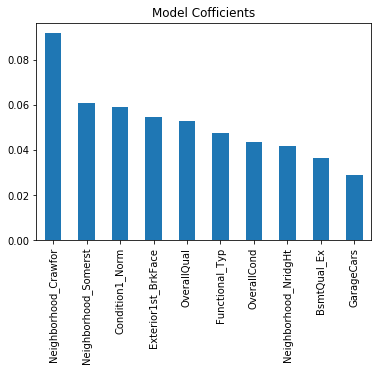

In [95]:
# lets see the top model parameter which is playing important role for predicting the price
coef_lasso = pd.Series(lasso.coef_,pred).sort_values(ascending=False)
print(coef_lasso.head(10))
coef_lasso.head(10).plot(kind = 'bar', title = "Model Cofficients")

# Conclusion

### The company wants to know below information:

## Below variables are significant in predicting the price of a house:
- Neighborhood_Crawfor
- Neighborhood_Somerst
- Condition1_Norm
- Exterior1st_BrkFace
- OverallQual
- Functional_Typ
- OverallCond
- Neighborhood_NridgHt
- BsmtQual_Ex
- GarageCars

## How well those variables describe the price of a house:
- Neighborhood_Crawfor    0.091763
- Neighborhood_Somerst    0.060844
- Condition1_Norm         0.058974
- Exterior1st_BrkFace     0.054673
- OverallQual             0.052834
- Functional_Typ          0.047344
- OverallCond             0.043685
- Neighborhood_NridgHt    0.041537
- BsmtQual_Ex             0.036229
- GarageCars              0.028877

## The optimal value of lambda for ridge and lasso regression:
- The optimal value of alpha for ridge and lasso regression are:
    - Alpha for Ridge: 20
    - Alpha for Lasso: 0.001



# Thank you